# 🏦 Bank Marketing Campaign Prediction
### Machine Learning Classification Project

**Objective:**  
Predict whether a customer will subscribe to a term deposit based on marketing campaign data.


In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

## 📌 Problem Statement

The goal of this project is to build a classification model that predicts whether a client will subscribe to a term deposit.

Target Variable: `deposit`
- 1 → Yes
- 0 → No


## 📂 Data Loading
We load the bank marketing dataset and inspect the first few rows.


In [6]:
df = pd.read_csv(r'bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## 🔍 Data Overview

In this section we explore:
- Dataset shape
- Data types
- Statistical summary
- Duplicate values


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [9]:
df.shape

(11162, 17)

In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [11]:
df.duplicated().sum()

0

In [12]:
df['deposit'].value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

### Observations:
- Dataset contains 11162 rows and 16 columns.
- Categorical features need encoding.
- No missing and duplicate values are observed.

## Target Variable Analysis

We check the distribution of customers who subscribed vs not subscribed.


In [15]:
df['poutcome'].value_counts()

poutcome
unknown    8326
failure    1228
success    1071
other       537
Name: count, dtype: int64

## Clean the job feature

In [17]:
df['job'] = df['job'].str.replace('.', '')

# EDA

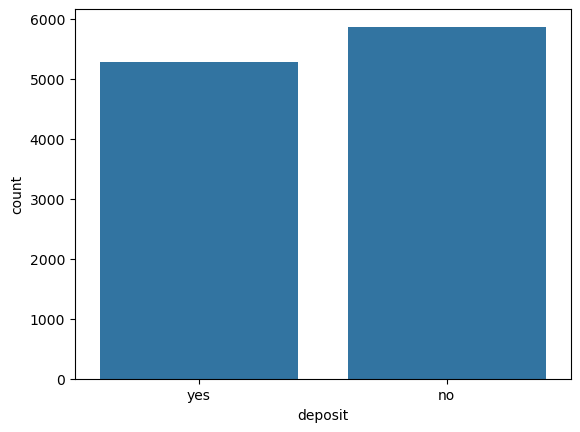

In [19]:
sns.countplot(x=df['deposit'])
plt.show()

  The dataset appears mostly balanced

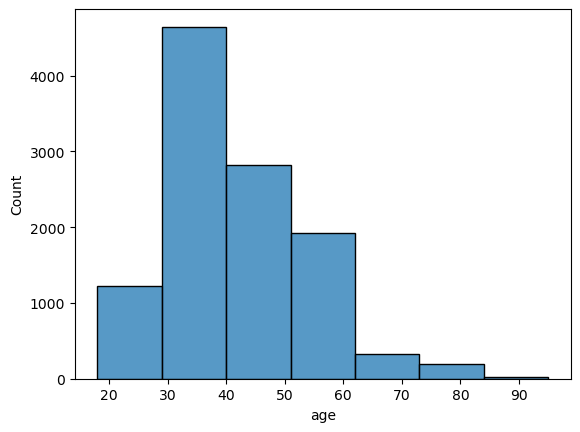

In [21]:
sns.histplot(df['age'],bins = 7)
plt.show()

### Age distribution insights
 
 Most customers fall between 25 to 45.

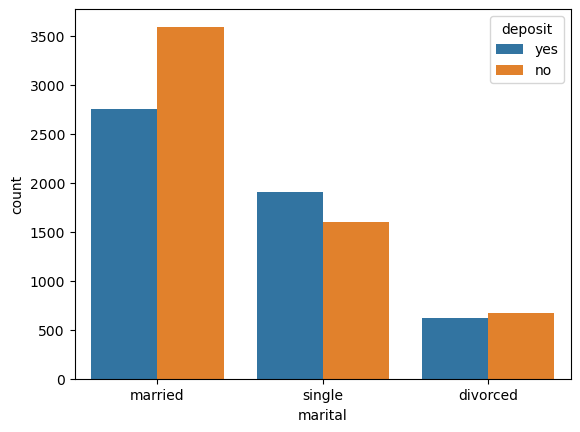

In [23]:
sns.countplot(x=df['marital'], hue=df['deposit'])
plt.show()

### Marital Status Insight:
Married customers show slightly higher subscription rate.


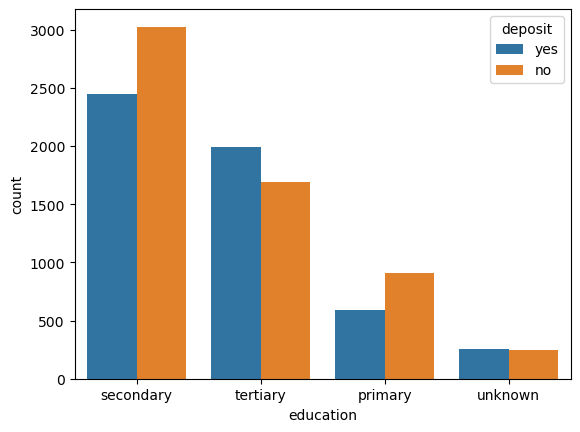

In [25]:
sns.countplot(x=df['education'], hue='deposit', data=df)
plt.show()

## Feature Engineering

New features created:
- never_contacted
- campaign_high
- balance_high

- `never_contacted`: Indicates if client was never contacted before.
- `campaign_high`: Indicates high campaign frequency (>5).
- `balance_high`: Indicates if balance is above median.


In [27]:
df['never_contacted'] = (df['pdays']==-1).astype(int)
df['campaign_high'] = (df['campaign']>5).astype(int)
df['balance_high'] = (df['balance'] > df['balance'].median()).astype(int)

## Encode the data

In [29]:
df['deposit'] = df['deposit'].map({'no':0, 'yes':1})

## Drop duration feature

- dropped because of the data leakage as we don't know the feature duration of call

In [31]:
df1 = df.drop('duration', axis =1)

##  Data Splitting

We split the dataset into training and testing sets (80-20 split).


In [33]:
x = df1.drop('deposit', axis = 1)
y = df1['deposit']

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42, test_size =0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8929, 18), (2233, 18), (8929,), (2233,))

##  Data Preprocessing Pipeline

- One-hot encoding for categorical features
- Scaling for numerical features


In [35]:
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
num_cols = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']
trf = ColumnTransformer(transformers = [('ohe', OneHotEncoder(drop ='first', handle_unknown='ignore'), cat_cols),
                                        ('scale', StandardScaler(), num_cols)],
                        remainder = 'passthrough', force_int_remainder_cols = False)

## Model 1 :- Logistic Regression

Baseline linear classification model.

In [37]:
lr_model = Pipeline(steps=
                     [('trf', trf),
                      ('lr', LogisticRegression())])

lr_model.fit(x_train, y_train)

Pipeline(steps=[('trf',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome']),
                                                 ('scale', StandardScaler(),
                                                  ['age', 'balance', 'day',
                                                   'campaign', 'pdays',
                                                   'previous'])])),
                ('lr', LogisticRegression())])

In [38]:
accuracy_score(y_test, lr_model.predict(x_test))

0.7205553067622034

## Model 2 :- Gradient Boosting

Ensemble boosting technique for improved performance.

In [40]:
gb_model = Pipeline(steps=
                     [('trf', trf),
                      ('gb', GradientBoostingClassifier())])

gb_model.fit(x_train, y_train)

Pipeline(steps=[('trf',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome']),
                                                 ('scale', StandardScaler(),
                                                  ['age', 'balance', 'day',
                                                   'campaign', 'pdays',
                                                   'previous'])])),
                ('gb', GradientBoostingClassifier())])

In [41]:
accuracy_score(y_test, gb_model.predict(x_test))

0.7447380206000895

## Model 3:- Random Forest

In [43]:
rf_model = Pipeline(steps=
                     [('trf', trf),
                      ('rf', RandomForestClassifier(random_state = 42, n_estimators=200,class_weight='balanced'))])

rf_model.fit(x_train, y_train)

Pipeline(steps=[('trf',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome']),
                                                 ('scale', StandardScaler(),
                                                  ['age', 'balance', 'day',
                                                   'campaign', 'pdays',
                                                   'previous'])])),
                ('rf',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, random_state=42))])

In [44]:
accuracy_score(y_test, rf_model.predict(x_test))

0.7344379758172862

In [45]:
models = {
    "Logistic Regression": lr_model,
    "Gradient Boosting": gb_model,
    "Random Forest": rf_model
}

results = []

for name, model in models.items():
    y_pred = model.predict(x_test)
    results.append([
        name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred)
    ])

import pandas as pd

comparison_df = pd.DataFrame(
    results,
    columns=["Model", "Accuracy", "Precision", "Recall"]
)

comparison_df

,Model,Accuracy,Precision,Recall
0,Logistic Regression,0.720555,0.769137,0.593252
1,Gradient Boosting,0.744738,0.811794,0.606373
2,Random Forest,0.734438,0.768100,0.636364


From the comparison above, Random Forest performed best overall in terms of recall and overall balance.

Therefore, Random Forest was selected as the final model.


##  Final Model Evaluation
Confusion Matrix and Classification Report


In [48]:
confusion_matrix(y_test, rf_model.predict(x_test))

array([[961, 205],
       [388, 679]], dtype=int64)

## 🎯 Threshold Optimization

Instead of default 0.5 threshold, we test custom threshold (0.39) to improve recall.


In [50]:
y_prob = rf_model.predict_proba(x_test)[:,1]
y_pred_new = (y_prob > 0.39).astype(int)

In [51]:
print("Accuracy:", accuracy_score(y_test, y_pred_new))
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_new))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_new))


Accuracy: 0.7066726377071205

Confusion Matrix:

[[772 394]
 [261 806]]

Classification Report:

              precision    recall  f1-score   support

           0       0.75      0.66      0.70      1166
           1       0.67      0.76      0.71      1067

    accuracy                           0.71      2233
   macro avg       0.71      0.71      0.71      2233
weighted avg       0.71      0.71      0.71      2233



## 🔎 Feature Importance Analysis

Random Forest model provides feature importance scores indicating which variables most influence prediction.

Top features help identify key drivers of customer subscription.


In [53]:
# Extract trained Rf model
rf = rf_model.named_steps['rf']

# Get feature importances
importances = rf.feature_importances_

# Get feature names directly from preprocessor
feature_names = rf_model.named_steps['trf'].get_feature_names_out()

import pandas as pd

feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
})

feature_importance_df = feature_importance_df.sort_values(
    by="Importance", ascending=False
)

feature_importance_df.head(10)


,Feature,Importance
36,scale__balance,0.153071
35,scale__age,0.136933
37,scale__day,0.121546
38,scale__campaign,0.064844
39,scale__pdays,0.040654
20,ohe__contact_unknown,0.038821
33,ohe__poutcome_success,0.033332
17,ohe__housing_yes,0.028041
40,scale__previous,0.024774
13,ohe__education_secondary,0.019463


In [54]:
feature_importance_df['Feature'] = feature_importance_df['Feature'] \
    .str.replace('scale__', '', regex=False) \
    .str.replace('ohe__', '', regex=False)



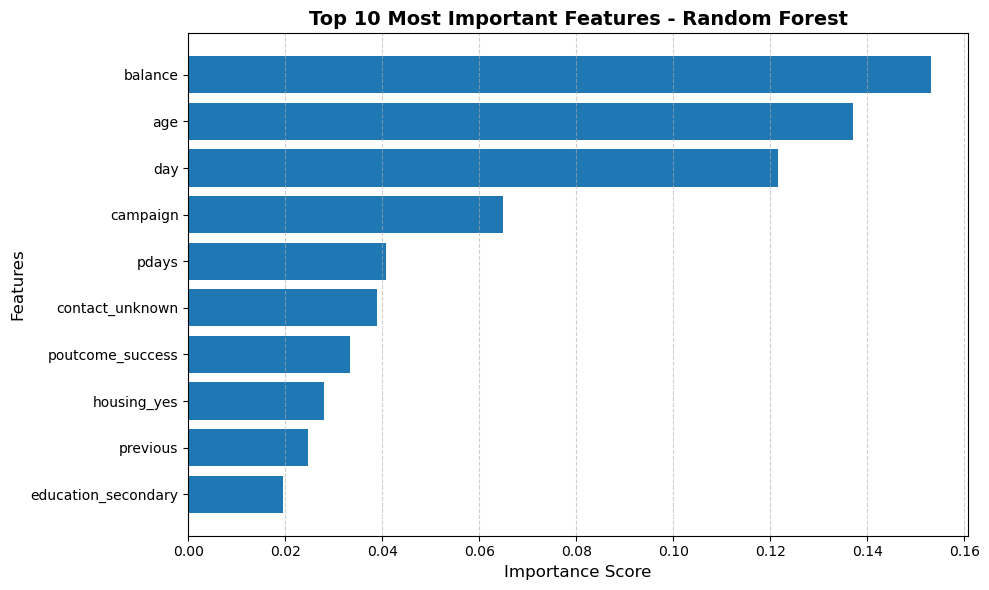

In [55]:
import matplotlib.pyplot as plt

top_features = feature_importance_df.head(10)

plt.figure(figsize=(10,6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.gca().invert_yaxis()

plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Top 10 Most Important Features - Random Forest", 
          fontsize=14, fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


## 📌 Feature Importance Insights

- Customer balance and age are the strongest predictors.
- Previous campaign success significantly increases subscription probability.
- Campaign timing and frequency influence customer decisions.
- Model can help optimize marketing targeting strategy.


# 📌 Final Business Insights & Conclusion

- Random Forest performed best overall.
- Campaign frequency and previous contact outcome impact subscription.
- Customers with higher balance show higher subscription probability.
- Model can help bank target high-probability customers and reduce marketing cost.

### Future Improvements:
- Hyperparameter tuning
- Cross-validation
- Feature importance analysis
- ROC Curve analysis


## Saving the Model

In [95]:
import joblib
joblib.dump(rf_model, "bank_model.pkl", compress = 3)

['bank_model.pkl']

In [96]:
import os
os.path.getsize("bank_model.pkl") / (1024*1024)


16.836438179016113